## SPAM Classification

### Loading the datasetn

In [14]:
import pandas as pd
data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/NLP/spam.csv',encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Removing extra columns

In [15]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Converting all text to lower

In [16]:
data['v2']=data['v2'].str.lower()

### Removing stopwords

In [17]:
from nltk.corpus import stopwords
eng=stopwords.words('english')
data['v2']=data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng)]))

### Tokenization

In [18]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
mail = data['v2'].values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(mail)

### Converting to sequence and padding

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded_docs = tokenizer.texts_to_sequences(mail)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

### Label Encoding the target variable

In [20]:
email_label=data['v1'].factorize()

### Setting the paramters for Neural Network

In [21]:
vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32

### RNN

In [49]:
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
RNN_model=Sequential()
RNN_model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
RNN_model.add(SimpleRNN(128, activation='tanh',return_sequences=True))
RNN_model.add(Dropout(0.2))
RNN_model.add(SimpleRNN(64, activation='tanh',return_sequences=False))
RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
history=RNN_model.fit(padded_sequence,email_label[0],batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
140/140 [==============================] - 8s 51ms/step - loss: 0.4271 - accuracy: 0.8557 - val_loss: 0.3843 - val_accuracy: 0.8700
Epoch 2/10
140/140 [==============================] - 7s 51ms/step - loss: 0.4143 - accuracy: 0.8638 - val_loss: 0.3911 - val_accuracy: 0.8700
Epoch 3/10
140/140 [==============================] - 7s 50ms/step - loss: 0.3332 - accuracy: 0.8836 - val_loss: 0.0836 - val_accuracy: 0.9722
Epoch 4/10
140/140 [==============================] - 7s 51ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0884 - val_accuracy: 0.9731
Epoch 5/10
140/140 [==============================] - 7s 51ms/step - loss: 0.0343 - accuracy: 0.9901 - val_loss: 0.0895 - val_accuracy: 0.9803
Epoch 6/10
140/140 [==============================] - 7s 51ms/step - loss: 0.0163 - accuracy: 0.9966 - val_loss: 0.0801 - val_accuracy: 0.9776
Epoch 7/10
140/140 [==============================] - 7s 51ms/step - loss: 0.0089 - accuracy: 0.9982 - val_loss: 0.0678 - val_accuracy: 0.9857

In [39]:
RNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           284352    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 200, 128)          20608     
                                                                 
 dropout_2 (Dropout)         (None, 200, 128)          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 317377 (1.21 MB)
Trainable params: 31737

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. The model has 2 RNN layers with different units. Hyperbolic tangent is used as an activation so that the ouput lies between -1 to 1. RNN returns an output sequence, the first RNN's return_sequences=True so that it returns only the last output from the sequence and for the second it is false because complete output sequence is required. In the last layer only 1 unit is present and sigmoid is used as it returns value between 0 and 1 which is used for binary classification. Model is compiled using loss as binary_crossentropy as it is a binary classification problem, ADAM optimizer is used as it converges faster than SGD.

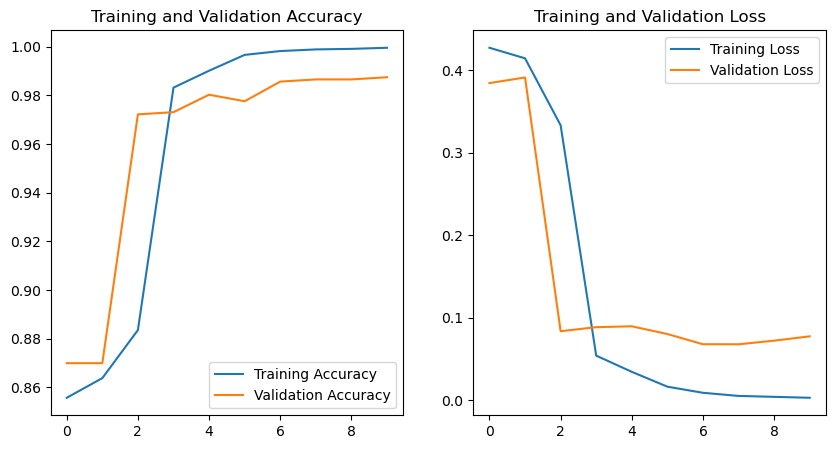

In [50]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### LSTM

In [46]:
from tensorflow.keras.layers import LSTM
LSTM_model=Sequential()
LSTM_model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
LSTM_model.add(LSTM(128, dropout=0.5,recurrent_dropout=0.5 ,activation='tanh',return_sequences=True))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(64, dropout=0.5,recurrent_dropout=0.5 ,activation='tanh',return_sequences=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1, activation='sigmoid'))
LSTM_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
history1=LSTM_model.fit(padded_sequence,email_label[0],batch_size=64,epochs=5,verbose=1,validation_split=0.2)

Epoch 1/5
70/70 [==============================] - 46s 630ms/step - loss: 0.2773 - accuracy: 0.9033 - val_loss: 0.0887 - val_accuracy: 0.9758
Epoch 2/5
70/70 [==============================] - 44s 633ms/step - loss: 0.0601 - accuracy: 0.9841 - val_loss: 0.0626 - val_accuracy: 0.9821
Epoch 3/5
70/70 [==============================] - 44s 621ms/step - loss: 0.0333 - accuracy: 0.9912 - val_loss: 0.0466 - val_accuracy: 0.9874
Epoch 4/5
70/70 [==============================] - 44s 626ms/step - loss: 0.0174 - accuracy: 0.9960 - val_loss: 0.0485 - val_accuracy: 0.9892
Epoch 5/5
70/70 [==============================] - 44s 635ms/step - loss: 0.0127 - accuracy: 0.9978 - val_loss: 0.0497 - val_accuracy: 0.9865


In [38]:
LSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           284352    
                                                                 
 lstm (LSTM)                 (None, 200, 128)          82432     
                                                                 
 dropout_4 (Dropout)         (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 416257 (1.59 MB)
Trainable params: 41625

Long short-term memory (LSTM) network is a recurrent neural network (RNN), which dealing with the vanishing gradient problem.It tries to remember all the past knowledge that the traditional model forgets as it might be irrelevant. The model has 2 LSTM layers with different units. Dropout is set to 0.5 to drop 50% of the units for the linear transformation of the inputs. Recurrent Dropout is set to 0.5 to drop 50% of the units for the linear transformation of the recurrent state. Hyperbolic tangent is used as an activation so that the ouput lies between -1 to 1. LSTM returns an output sequence, the first LSTM's return_sequences=True so that it returns only the last output from the sequence and for the second it is false because complete output sequence is required. In the last layer only 1 unit is present and sigmoid is used as it returns value between 0 and 1 which is used for binary classification. Model is compiled using loss as binary_crossentropy as it is a binary classification problem, ADAM optimizer is used as it converges faster than SGD.

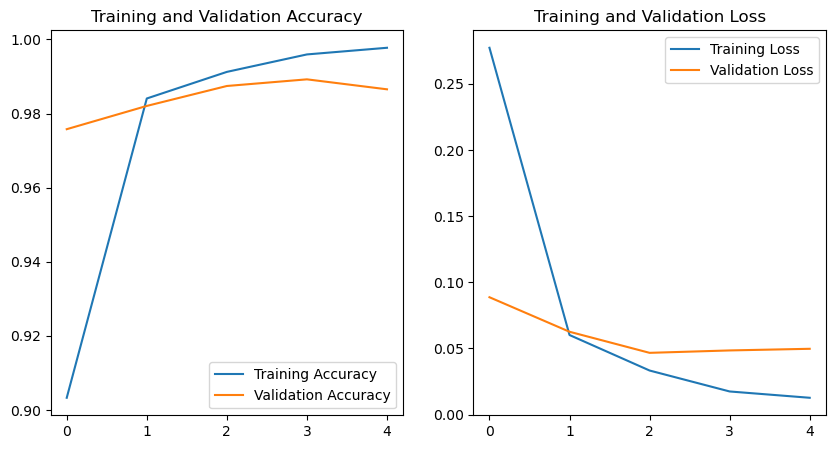

In [47]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predictions

In [44]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(RNN_model.predict(tw).round().item())
    print("RNN Model Predicted label: ", email_label[1][prediction])
    prediction = int(LSTM_model.predict(tw).round().item())
    print("LSTM Model Predicted label: ", email_label[1][prediction])

import random
random_text=data['v2'][random.randint(0, 5572)]
print(random_text)
predict_sentiment(random_text)

urgent! trying contact u todays draw shows å£800 prize guaranteed. call 09050000460 land line. claim j89. po box245c2150pm
1/1 [==============================] - 0s 16ms/step
RNN Model Predicted label:  spam
1/1 [==============================] - 0s 25ms/step
LSTM Model Predicted label:  spam


### For Spam Classification on the given dataset both RNN and LSTM have given almost the same accuracy. The accuracy would vary if the model was required to store past knowledge that the network would forget considering it as irrelevant or store long term dependencies like while predicting stock value.